We're going to create an entry for the [Digit Recognizer Kaggle Competition](https://www.kaggle.com/c/digit-recognizer)

The data csvs can be downloaded [here](https://www.kaggle.com/c/digit-recognizer/data)

Import the needed libraries

In [1]:
import pandas as pd    # data formatting
import numpy as np     # numeric library
from sklearn.neighbors import KNeighborsClassifier  # machine learning
from sklearn.metrics import confusion_matrix
import random

In [2]:
%matplotlib inline
from matplotlib import pylab, pyplot  # plotting

Import the data from csv files into Pandas DataFrames. A DataFrame is similar to an Excel spreadsheet; it is made up of columns and rows.

In [3]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

Let's see what the data looks like

In [4]:
train.shape

(42000, 785)

This dataframe has 42,000 rows and 785 columns.  Each row corresponds to 1 digit.  In the 0th column is a label (0-9) saying what digit it is.  The other 784 columns each represent a single pixel.  

The 28x28 square of the image has been *unrolled* (or *reshaped*) into a single long row 1x784.  There are 42,000 handwritten digits represented here!

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.iloc[41990:41999,0:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8
41990,3,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000,42000,42000,42000
mean,4.456643,0,0,0,0,0,0,0,0,0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0,0,0,0
std,2.887730,0,0,0,0,0,0,0,0,0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0,0,0,0
min,0.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
25%,2.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
50%,4.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
75%,7.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
max,9.000000,0,0,0,0,0,0,0,0,0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0,0,0,0


Let's visualize a single row:

this digit is 3


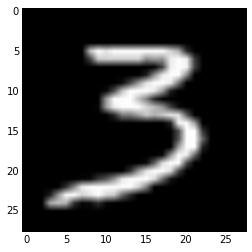

In [9]:
print "this digit is", train.iloc[25,0]
digit = np.reshape(train.iloc[25,1:785], (28,28))
pylab.imshow(digit, cmap='gray')

It is very slow to work with 42,000 rows of data.  Let's take a subset.  Also, let's use part of the labeled data as our test set, so that we can calculate our accuracy

In [10]:
rows = random.sample(train.index, 5000)
train_small = train.ix[rows[:4000]]
test_small = train.ix[rows[4000:]]

In [11]:
train_small.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40954,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1631,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21001,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
knn = KNeighborsClassifier(n_neighbors=4)

In [20]:
knn.fit(train_small.iloc[:,1:], train_small.iloc[:,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=4, p=2, weights='uniform')

In [21]:
predictions = knn.predict(test_small.iloc[:,1:])

In [22]:
test_labels = test_small.iloc[:,0].values

In [23]:
predictions[:10]

array([1, 5, 4, 2, 1, 7, 7, 3, 1, 9])

In [24]:
test_labels[:10]

array([1, 5, 4, 2, 1, 2, 7, 3, 1, 9])

In [25]:
accuracy = sum(predictions == test_labels)/float(len(predictions))
print accuracy

0.936


Which ones are we getting wrong?

In [26]:
wrong = np.where(predictions != test_labels)

In [27]:
wrong

(array([  5,  14,  18,  32,  41,  44,  71,  88, 114, 188, 189, 198, 203,
        210, 222, 237, 300, 320, 334, 341, 360, 365, 392, 401, 407, 411,
        415, 419, 423, 426, 427, 436, 447, 456, 462, 475, 478, 507, 508,
        513, 537, 541, 559, 564, 566, 581, 598, 623, 665, 667, 679, 698,
        726, 785, 810, 847, 850, 872, 881, 907, 951, 953, 991, 996]),)

predicted:  0 answer:  0


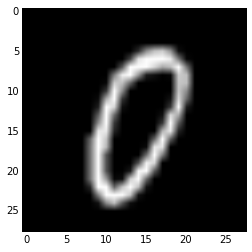

In [28]:
print "predicted: ", predictions[920], "answer: ", test_labels[920]
digit = np.reshape(test_small.iloc[920,1:785], (28,28))
pylab.imshow(digit, cmap='gray')

What are the nearest neighbors to that wrong one?

In [31]:
dist, ind = knn.kneighbors(test_small.iloc[920,1:785])
print ind

[[1260 2717 1679  304]]


this is a  4


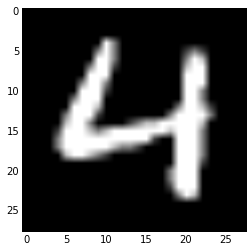

In [32]:
print "this is a ", train_small.iloc[3054,0]
digit = np.reshape(train_small.iloc[3054,1:785], (28,28))
pylab.imshow(digit, cmap='gray')

Confusion Matrix: See how data is labeled and mislabeled, by category.

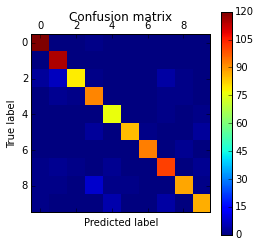

In [33]:
cm = confusion_matrix(test_labels, predictions)
pyplot.matshow(cm)
pyplot.title('Confusion matrix')
pyplot.colorbar()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')
pyplot.show()

Since we're usually right, it's hard to see what we're getting wrong (shades of blue).  Let's ignore the cases where we are right:

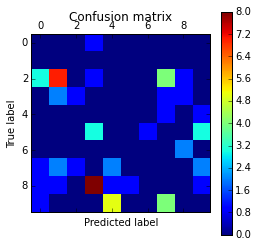

In [43]:
np.fill_diagonal(cm, 0)
pyplot.matshow(cm)
pyplot.title('Confusion matrix')
pyplot.colorbar()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')
pyplot.show()

To enter the Kaggle Competition:

In [48]:
kaggle_predictions = knn.predict(test)

In [49]:
kaggle_predictions_df = pd.DataFrame({'Label': kaggle_predictions, 'ImageId': range(1,1+len(kaggle_predictions))})

In [50]:
kaggle_predictions_df.to_csv("predictions.csv", index=False)